# Analyzing the UncertaintyForest Class by Reproducing Mutual Information Estimates

If you haven't seen it already, take a look at other tutorials to setup and install the ProgLearn package: `installation_guide.ipynb`.

*Goal: Run the UncertaintyForest class to produce a figure that compares estimated normalized mutual information values for the UncertaintyForest, KSG, Mixed KSG, and IRF algorithms, as in Figure 3 from [this paper](https://arxiv.org/pdf/1907.00325.pdf)*

## Import Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from proglearn.forest import UncertaintyForest

import sys

sys.path.append("../../docs/tutorials/functions")
from unc_forest_tutorials_functions import plot_setting, plot_fig3

In [2]:
# Setting figures.
settings = [
    {
        "name": "Spherical Gaussians",
        "kwargs": {},
    },
    {
        "name": "Elliptical Gaussians",
        "kwargs": {"var1": 3},
    },
    {
        "name": "Three Class Gaussians",
        "kwargs": {"three_class": True},
    },
]

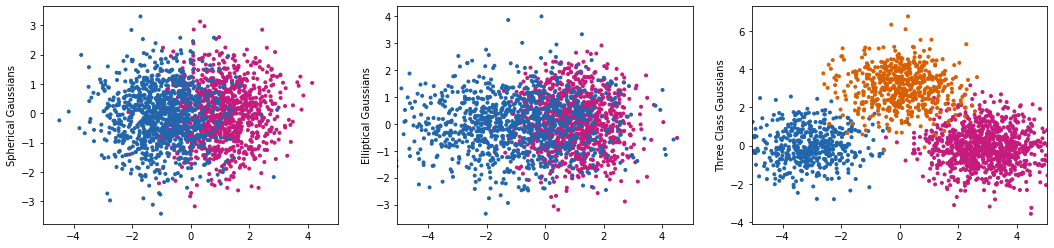

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot data.
fig, axes = plt.subplots(1, len(settings), figsize=(18, 4))
for i, setting in enumerate(settings):
    plot_setting(2000, setting, axes[i])

plt.show()
plt.clf()

## Specify Parameters

In [4]:
n = 6000  # number of samples
mus = range(5)  # range of means
ds = range(1, 16)  # range of dimensions
mu = 1  # mean
num_trials = 20  # number of trials to run
d = 2  # dimension
pis = [0.05 * i for i in range(1, 20)]  # prior distribution

## Specify Learners
Now, we'll specify which learners we'll compare (by label). Figure 3 uses four different learners, which are further specified in the function `estimate_mi`, which returns estimates of mutual information for a given dataset (X, y) and type of learner.

In [5]:
# Algorithms used to produce Figure 3
algos = [
    {
        "label": "IRF",
        "title": "Isotonic Reg. Forest",
        "color": "#fdae61",
    },
    {
        "label": "KSG",
        "title": "KSG",
        "color": "#1b9e77",
    },
    {
        "label": "Mixed KSG",
        "title": "Mixed KSG",
        "color": "purple",
    },
    {
        "label": "UF",
        "title": "Uncertainty Forest",
        "color": "#F41711",
    },
]

parallel = True

## Plot Figure 3

Finally, we'll run the code to obtain and plot the spherical, elliptical, and three class Gaussians, as well as estimated mutual information vs. class priors and dimensionality (9 subplots).

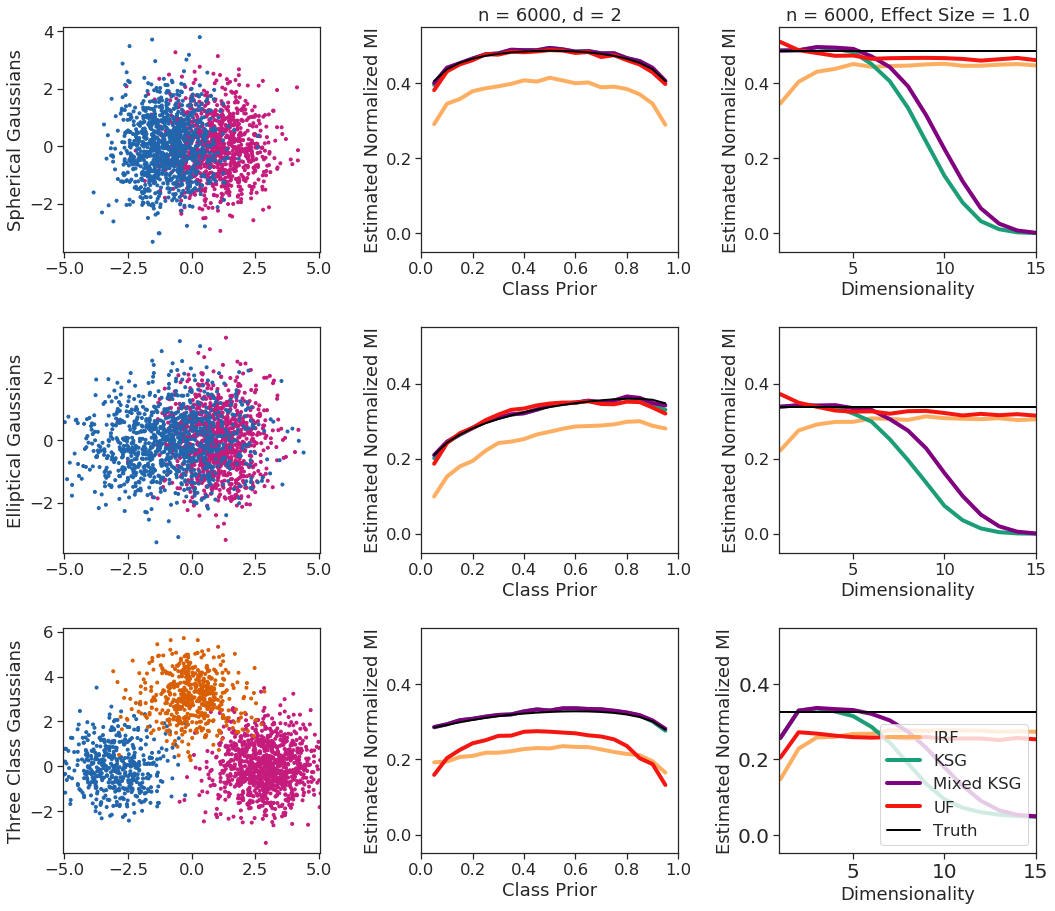

In [6]:
plot_fig3(algos, n, d, mu, settings, pis, ds, num_trials, parallel=parallel)